In [1]:

import pandas as pd
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:

path = kagglehub.dataset_download("chicago/chicago-taxi-rides-2016")

print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: /kaggle/input/chicago-taxi-rides-2016
['column_remapping.json', 'chicago_taxi_trips_2016_01.csv', 'chicago_taxi_trips_2016_11.csv', 'data_dictionary.csv', 'chicago_taxi_trips_2016_05.csv', 'chicago_taxi_trips_2016_12.csv', 'chicago_taxi_trips_2016_04.csv', 'chicago_taxi_trips_2016_07.csv', 'chicago_taxi_trips_2016_10.csv', 'chicago_taxi_trips_2016_06.csv', 'chicago_taxi_trips_2016_08.csv', 'chicago_taxi_trips_2016_03.csv', 'chicago_taxi_trips_2016_02.csv', 'chicago_taxi_trips_2016_09.csv']


In [4]:

df = os.path.join(path,"chicago_taxi_trips_2016_01.csv" )
df=pd.read_csv(df)
df.isnull().sum()

,0
taxi_id,23
trip_start_timestamp,0
trip_end_timestamp,125
trip_seconds,314
trip_miles,14
pickup_census_tract,1705805
dropoff_census_tract,738326
pickup_community_area,285789
dropoff_community_area,313655
fare,33


In [5]:
df=df.fillna(0)
df.isnull().sum()

,0
taxi_id,0
trip_start_timestamp,0
trip_end_timestamp,0
trip_seconds,0
trip_miles,0
pickup_census_tract,0
dropoff_census_tract,0
pickup_community_area,0
dropoff_community_area,0
fare,0


In [6]:
df.drop(["trip_start_timestamp","trip_end_timestamp","payment_type"],axis=1, inplace=True)


In [7]:

x=df.drop("fare",axis=1)
y=df["fare"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:

model=LinearRegression()
model.fit(x_train,y_train)
p=model.predict(x_test)
print(p)
print(y_test)

[ 6.99994779 15.24994887  7.24999819 ...  4.74993768 10.85003551
  5.24998945]
1163937     7.00
930304     15.25
1060766     7.25
849271      5.50
1173974    10.25
           ...  
722495     10.00
765806     16.75
387912      4.75
199061     10.85
100886      5.25
Name: fare, Length: 341161, dtype: float64


In [9]:
score=r2_score(y_test,p)
print(score)


0.9999999052065014


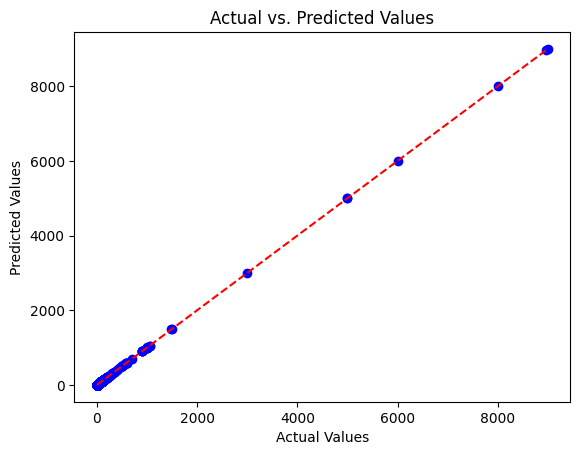

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test,p, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()